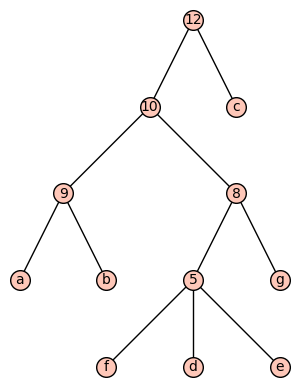

In [152]:
G = Graph({
    "a" : [9],
    "b" : [9],
    "c" : [12],
    "d" : [5],
    "e" : [5],
    "f" : [5],
    "g" : [8],
    12: ["c", 10],
    10: [9, 8, 12],
    9: ["a", "b", 10],
    8: ["g", 5, 10],
    5:["d", "e", "f", 8]
    
})

dict = {
    5: True,
    8: False,
    9: False,
    10: True,
    12: False
       }

plot(G, layout='tree', tree_root=12)

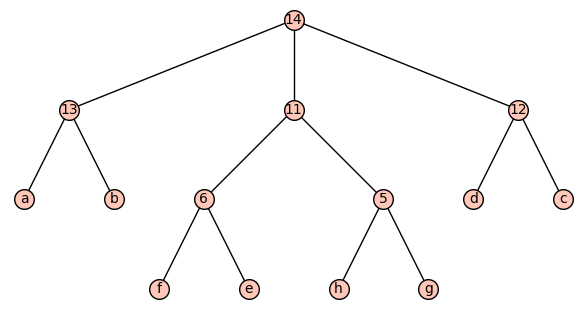

In [150]:
H = Graph({
    "a" : [13],
    "b" : [13],
    "c" : [12],
    "d" : [12],
    "e" : [6],
    "f" : [6],
    "g" : [5],
    "h" : [5],
    14: [13, 12, 11],
    13: ["a", "b", 14],
    12: ["c", "d", 14],
    11: [6, 5, 14],
    6: ["e", "f", 11],
    5:["g", "h", 11]
    
})

dict = {
    5: False,
    6: False,
    11: True,
    12: True,
    13: True,
    14: False
       }

plot(H, layout='tree', tree_root=14)

In [141]:
######################################
########### POMOZNE METODE ###########
######################################

def isLeaf(c, dict):
    return dict.get(c) == None

def getChildren(c, H, Bfslist):
    '''Input: c node, H graph, Bfslist list of nodes in reverse Bfs order. Output: list of children of c '''
    neighbors = H.neighbors(c)
    children = []
    for u in neighbors:
        if Bfslist.index(u) < Bfslist.index(c):
            children.append(u)
    return children

def initializeR( c, children, dict, Bfslist, R, gamma_S, gamma):
    '''Input: c node,
            children list of children of c,
            dict dictionary for U = true; + = False; None = leaf,
            Bfslist list of nodes in reverse Bfs order,
            R old R list
        Output: new R list '''
    if dict.get(c):
        if len(children) == 2:
            if gamma_S[Bfslist.index(children[0])] == 1 and gamma[Bfslist.index(children[1])] == 1:
                R[Bfslist.index(c)] = 1
            if gamma_S[Bfslist.index(children[1])] == 1 and gamma[Bfslist.index(children[0])] == 1:
                R[Bfslist.index(c)] = 1
    return R

def initializeA (c, children, dict, Bfslist, A, R):
    '''Input: c node,
                children list of children of c,
                dict dictionary for U = true; + = False; None = leaf,
                Bfslist list of nodes in reverse Bfs order,
                A old A* list
        Output: new A* list '''
    if isLeaf(c, dict):
        A[Bfslist.index(c)] = 1
    if dict.get(c) == False:
        allChildrenLeaves = false
        nonLeafChildren = false
        hasR = false
        for u in children:
            if isLeaf(c, dict):
                nonLeafChildren = True
            else:
                allChildrenLeaves = True
            if R[Bfslist.index(u)] == 1:
                hasR = True
        if allChildrenLeaves:
            A[Bfslist.index(c)] = 1
        if nonLeafChildren and hasR:
            A[Bfslist.index(c)] = 1
    return A
    
def initializeRstar (c, Bfslist, A, Rstar, children):
    '''Input: c node,
                children list of children of c,
                dict dictionary for U = true; + = False; None = leaf,
                Bfslist list of nodes in reverse Bfs order,
                A A* list,
                Rstar R* list
        Output: new R* list '''
    for u in children:
        if A[Bfslist.index(u)] == 1:
            Rstar[Bfslist.index(c)] = 1
    return Rstar

def initializeGamma(c, dict, Bfslist, gamma, children):
    if isLeaf(c, dict):
        gamma[Bfslist.index(c)] = 1
    if dict.get(c):
        for u in children:
            gamma[Bfslist.index(c)] += gamma[Bfslist.index(u)]
    if not dict.get(c):
        if atLeastOneChildIsALeaf:
            gamma[Bfslist.index(c)] = 1
        else:
            gamma[Bfslist.index(c)] = 2
    return gamma
        

def allChildrenAreLeaves(children, dict):
    allLeaves = true
    for u in children:
        if not isLeaf(u, dict):
            allLeaves = false
            break;
    return allLeaves

def atLeastOneChildIsALeaf(children, dict):
    for u in children:
        if isLeaf(u, dict):
            return True
    return False

def doesTGcsatisfyPropertyP(c, children, dict, gamma_S, R, Bfslist, H):
    counterL = 0
    counterR = 0
    counterS = 0
    for u in children:
        if isLeaf(u, dict):
            counterL += 1
        if R[Bfslist.index(u)] == 1:
            counterR += 1
        if counterL + counterR == 2:
            return True
        
        if dict.get(u):
            subchildren = getChildren(u, H, Bfslist)
            if len(subchildren) == 2:
                if gamma_S[Bfslist.index(subchildren[0])] == 1 and gamma_S[Bfslist.index(subchildren[1])] == 1:
                    counterS += 1
        if counterR == 1 and counterS == 1:
            return True
    return False

def calculateQ(c, children, Rstar, gamma, Bfslist):
    Q = 0
    for u in children:
        Q += gamma[Bfslist.index(u)]
    if Rstar[Bfslist.index(c)] == 1:
        return Q
    else:
        return Q + 1
    

In [158]:
def isciGammaS(H, dict, root):
    Bfslist = H.lex_BFS(initial_vertex=root, reverse=True)
    gamma_S = len(Bfslist) * [0]
    gamma = len(Bfslist) * [0]
    R = len(Bfslist) * [0]
    A = len(Bfslist) * [0]
    Rstar = len(Bfslist) * [0]
    for c in Bfslist:
        children = getChildren(c, H, Bfslist)
        R = initializeR(c, children, dict, Bfslist, R, gamma_S, gamma)
        A = initializeA (c, children, dict, Bfslist, A, R)
        Rstar = initializeRstar (c, Bfslist, A, Rstar, children)
        initializeGamma(c, dict, Bfslist, gamma, children)
        
        if isLeaf(c, dict):                                                    # c is leaf
            gamma_S[Bfslist.index(c)] = 1
        elif dict.get(c):                                                        # c has label U
            for u in children:
                gamma_S[Bfslist.index(c)] += gamma_S[Bfslist.index(u)]
        elif not dict.get(c):                                                       # c has label +
            if allChildrenAreLeaves(children, dict):
                gamma_S[Bfslist.index(c)] = 1
            elif doesTGcsatisfyPropertyP(c, children, dict, gamma_S, R, Bfslist, H): #T_G(c) has property P
                gamma_S[Bfslist.index(c)] = 2
            elif len(children) >= 3:
                gamma_S[Bfslist.index(c)] = 3
            elif isLeaf(children[0], dict) and not isLeaf(children[1], dict):
                gamma_S[Bfslist.index(c)] = calculateQ(children[1], getChildren(children[1], H, Bfslist), Rstar, gamma, Bfslist)
            elif isLeaf(children[1], dict) and not isLeaf(children[0], dict):
                gamma_S[Bfslist.index(c)] = calculateQ(children[0], getChildren(children[0], H, Bfslist), Rstar, gamma, Bfslist)
            else:
                u1 = children[0]
                u2 = children[1]
                if (calculateQ(u1, getChildren(u1, H, Bfslist)) == 3 or calculateQ(u2, getChildren(u2, H, Bfslist)) == 3 or gamma_S[Bfslist.index(u1)] == 3 or gamma_S[Bfslist.index(u2)] == 3):
                    gamma_S[Bfslist.index(c)] = 3
                else:
                    gamma_S[Bfslist.index(c)] = 4
                                                                                 
    return gamma_S

In [159]:
isciGammaS(H, dict, 14)

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]

In [160]:
isciGammaS(G, dict, 12)

[1, 1, 1, 1, 1, 3, 1, 1, 3, 4, 1, 2]